In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

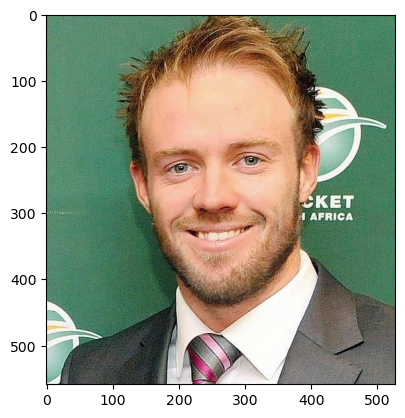

In [3]:
x = cv2.imread("0030_01.jpg")
x_rgb = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(x_rgb)

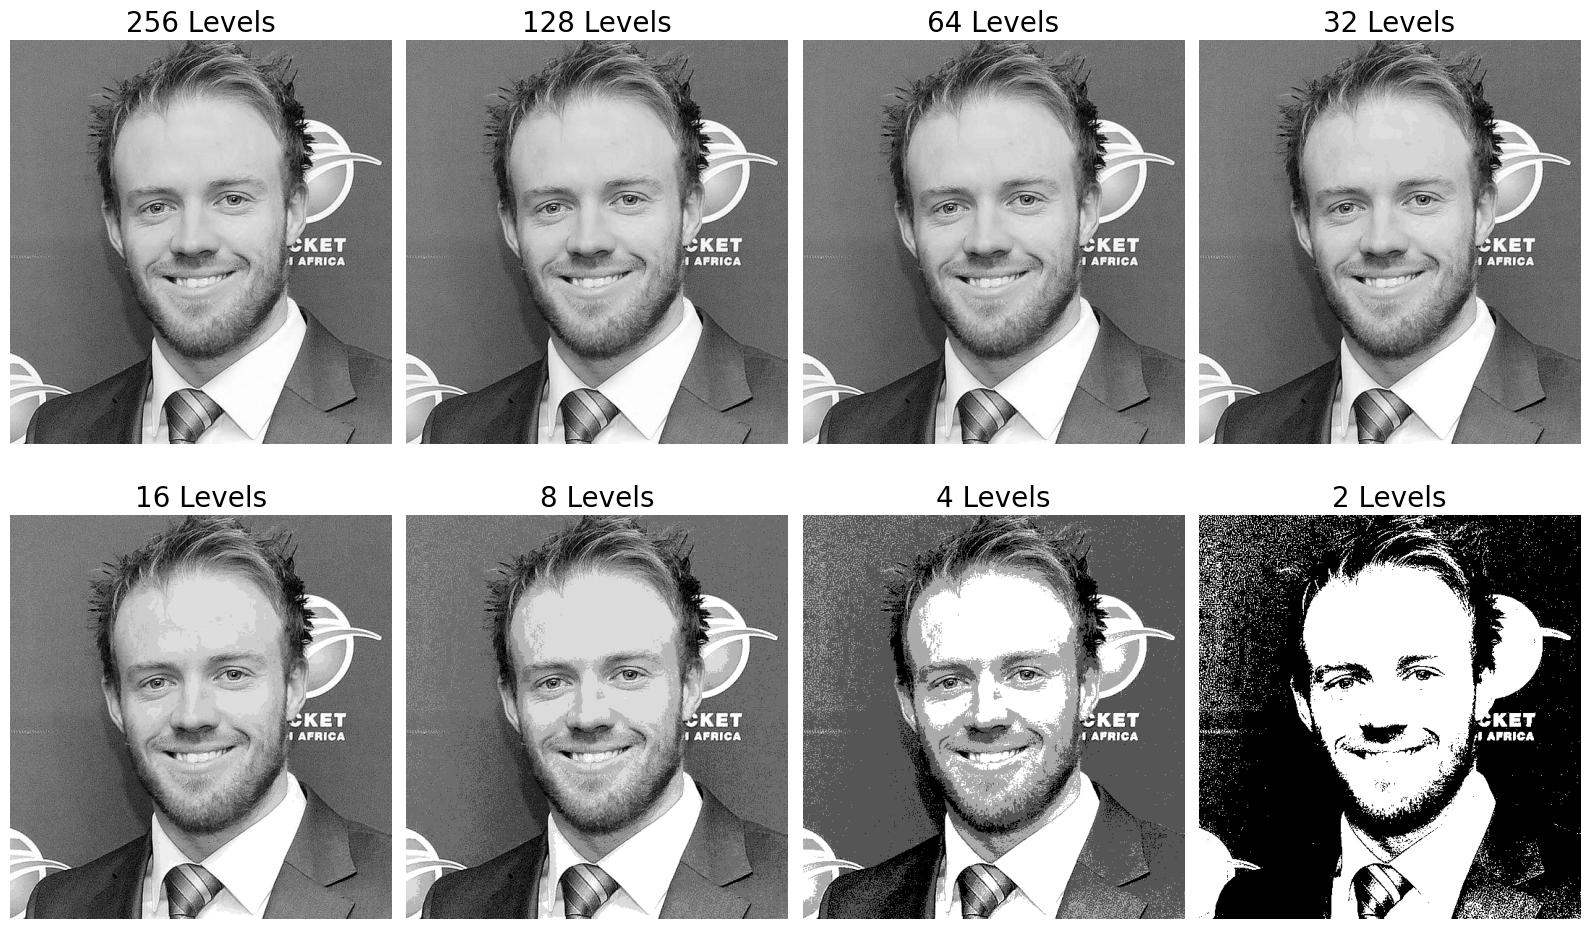

In [ ]:
# Q1
 
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("0030_01.jpg", cv2.IMREAD_GRAYSCALE)

Quantization_Level_list = [256, 128, 64, 32, 16, 8, 4, 2]

plt.figure(figsize=(16, 10))

for idx, level in enumerate(Quantization_Level_list):
    step = 256 // level
    quantized = (image // step) * step

    plt.subplot(2, 4, idx + 1)
    plt.imshow(quantized, cmap='gray')  # Grayscale display
    plt.title(f'{level} Levels',fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()


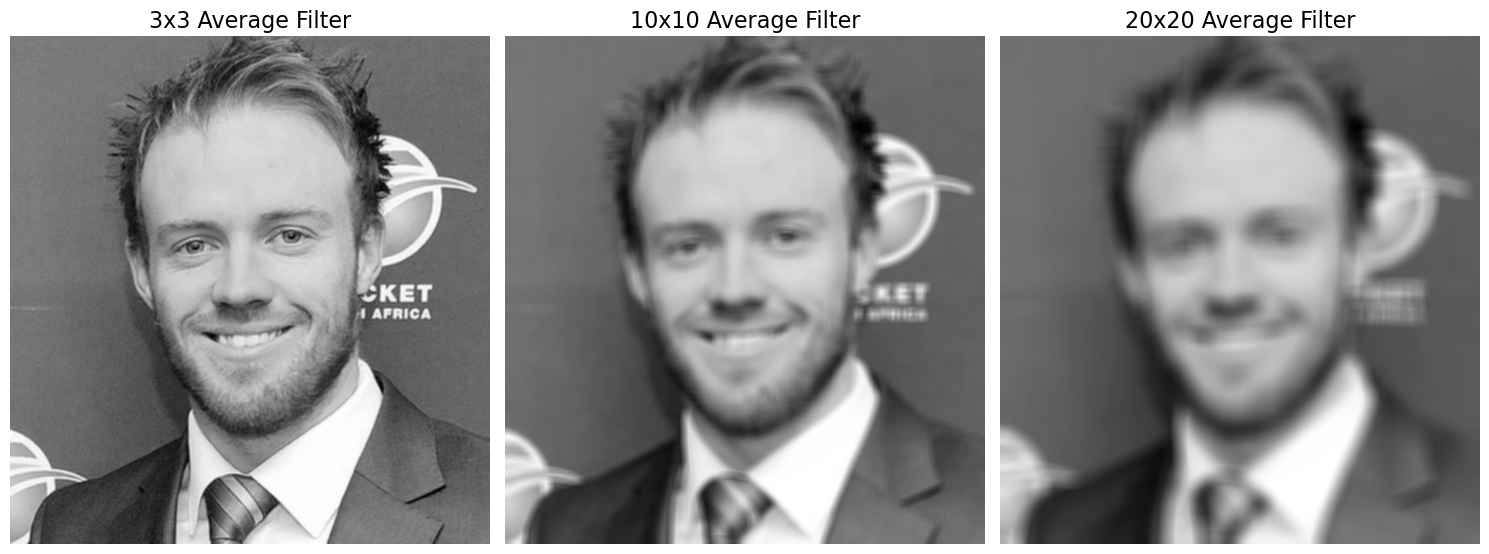

In [ ]:
# Q2

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("0030_01.jpg", cv2.IMREAD_GRAYSCALE)

def average_filter(img, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32) / (ksize * ksize) 
    filtered = cv2.filter2D(img, -1, kernel)
    return filtered

Avg_filter_sizes = [3, 10, 20]

plt.figure(figsize=(15, 6))

for index, fil_size in enumerate(Avg_filter_sizes):
    avg = average_filter(image, fil_size)
    plt.subplot(1, 3, index + 1)
    plt.imshow(avg, cmap='gray')
    plt.title(f"{fil_size}x{fil_size} Average Filter", fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()


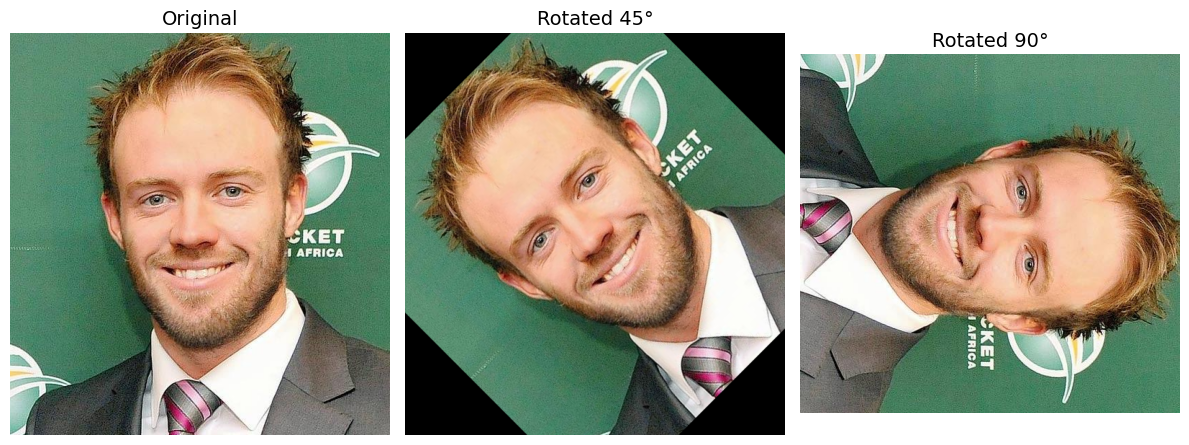

In [ ]:
# Q3

import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread('0030_01.jpg')

img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

(h, w) = img.shape[:2]
center = (w // 2, h // 2)

M_45 = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(img, M_45, (w, h))

rotated_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

images = [img, rotated_45, rotated_90]
titles = ['Original', 'Rotated 45°', 'Rotated 90°']

plt.figure(figsize=(12, 6))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i])  
    plt.title(titles[i],fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()


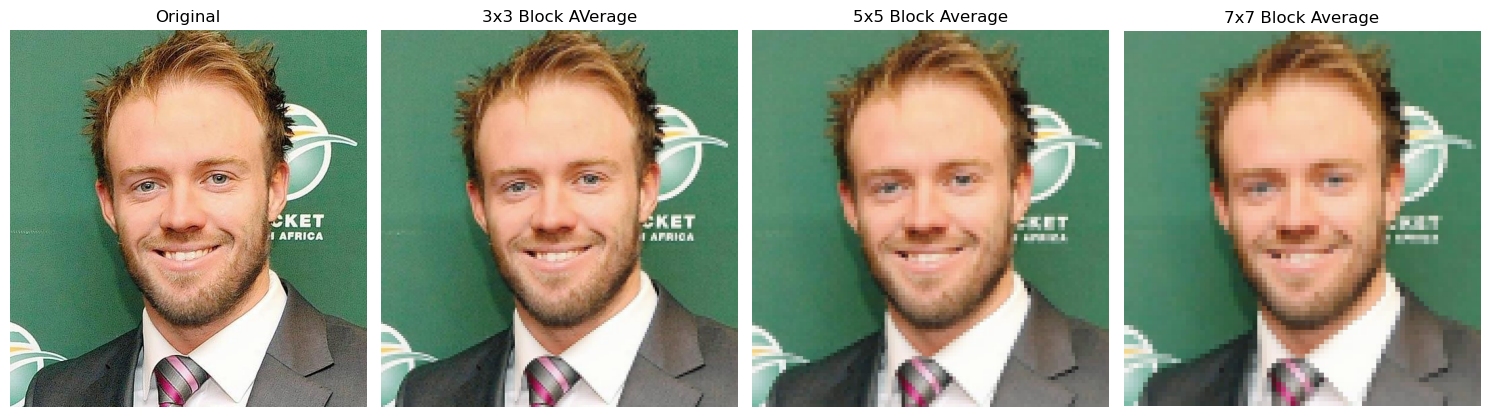

In [ ]:
# Q4

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('0030_01.jpg')
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def block_average(img, block_size):
    h, w = img.shape[:2]
    
    h_crop = h - (h % block_size)
    w_crop = w - (w % block_size)
    img_cropped = img[:h_crop, :w_crop]
    
    output = np.zeros_like(img_cropped)

    for i in range(0, h_crop, block_size):
        for j in range(0, w_crop, block_size):
            block = img_cropped[i:i+block_size, j:j+block_size]
            avg_color = np.mean(block, axis=(0, 1), dtype=int)
            output[i:i+block_size, j:j+block_size] = avg_color

    return output


block_sizes = [1,3, 5, 7]
Titles =['Original','3x3 Block AVerage','5x5 Block Average','7x7 Block Average']

plt.figure(figsize=(15, 5))
for idx, bsize in enumerate(block_sizes):
    avg_img = block_average(img, bsize)
    plt.subplot(1, 4, idx + 1)
    plt.imshow(avg_img)
    plt.title(Titles[idx])
    plt.axis('off')

plt.tight_layout()
plt.show()
